<a href="https://colab.research.google.com/github/Venu-GR/INFO-5731_Venu-GR/blob/main/Vennapusa_Venu_Gopal_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

# Sample text data for demonstration
texts = ["The quick brown fox jumps over the lazy dog.", "The fox is quick and smart."]

# Tokenize the text data
tokens = [text.lower().split() for text in texts]

# Part 1: Count the frequency of all trigrams
from collections import defaultdict

def get_ngrams(tokens, n=3):
    ngram_counts = defaultdict(int)
    for sentence in tokens:
        for i in range(len(sentence) - n + 1):
            ngram = tuple(sentence[i:i + n])
            ngram_counts[ngram] += 1
    return ngram_counts

trigrams = get_ngrams(tokens, n=3)
print("Trigram frequencies:", dict(trigrams))

# Part 2: Calculate bigram probabilities
def calculate_bigram_probabilities(tokens):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    for sentence in tokens:
        for i in range(len(sentence) - 1):
            bigram = (sentence[i], sentence[i + 1])
            bigram_counts[bigram] += 1
            unigram_counts[sentence[i]] += 1
    probabilities = {bigram: bigram_counts[bigram] / unigram_counts[bigram[0]] for bigram in bigram_counts}
    return probabilities

bigram_probs = calculate_bigram_probabilities(tokens)
print("Bigram probabilities:", bigram_probs)

# Part 3: Extract noun phrases (simple approach) and calculate relative probabilities
import re

def extract_noun_phrases(sentence):
    return re.findall(r'\b\w+\b', sentence)  # Placeholder: Implement custom noun phrase extraction if needed

noun_phrases = []
for sentence in texts:
    noun_phrases.extend(extract_noun_phrases(sentence.lower()))

phrase_freqs = {phrase: noun_phrases.count(phrase) for phrase in set(noun_phrases)}
max_freq = max(phrase_freqs.values())
relative_probs = {phrase: freq / max_freq for phrase, freq in phrase_freqs.items()}

# Display in table format
import pandas as pd
table = pd.DataFrame([relative_probs])
print("\nRelative Probability Table:\n", table)





Trigram frequencies: {('the', 'quick', 'brown'): 1, ('quick', 'brown', 'fox'): 1, ('brown', 'fox', 'jumps'): 1, ('fox', 'jumps', 'over'): 1, ('jumps', 'over', 'the'): 1, ('over', 'the', 'lazy'): 1, ('the', 'lazy', 'dog.'): 1, ('the', 'fox', 'is'): 1, ('fox', 'is', 'quick'): 1, ('is', 'quick', 'and'): 1, ('quick', 'and', 'smart.'): 1}
Bigram probabilities: {('the', 'quick'): 0.3333333333333333, ('quick', 'brown'): 0.5, ('brown', 'fox'): 1.0, ('fox', 'jumps'): 0.5, ('jumps', 'over'): 1.0, ('over', 'the'): 1.0, ('the', 'lazy'): 0.3333333333333333, ('lazy', 'dog.'): 1.0, ('the', 'fox'): 0.3333333333333333, ('fox', 'is'): 0.5, ('is', 'quick'): 1.0, ('quick', 'and'): 0.5, ('and', 'smart.'): 1.0}

Relative Probability Table:
         and       fox     jumps      over     brown        is     quick  \
0  0.333333  0.666667  0.333333  0.333333  0.333333  0.333333  0.666667   

       lazy  the       dog     smart  
0  0.333333  1.0  0.333333  0.333333  


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
# Custom TF-IDF calculation
import math
from collections import Counter

# Part 1: Build TF-IDF matrix
def calculate_tf(text):
    term_freq = Counter(text.lower().split())
    total_terms = len(text.split())
    return {word: freq / total_terms for word, freq in term_freq.items()}

def calculate_idf(docs):
    import math
    idf_values = {}
    total_docs = len(docs)
    all_words = set([word for doc in docs for word in doc.lower().split()])

    for word in all_words:
        word_count = sum(1 for doc in docs if word in doc.lower())
        idf_values[word] = math.log(total_docs / (1 + word_count))
    return idf_values

def calculate_tf_idf(text, idf):
    tf = calculate_tf(text)
    return {word: tf[word] * idf[word] for word in tf}

texts = ["The quick brown fox jumps", "Lazy dog jumps over the quick fox"]
idf = calculate_idf(texts)
tf_idf_matrix = [calculate_tf_idf(text, idf) for text in texts]

print("TF-IDF Matrix:\n", tf_idf_matrix)

# Part 2: Cosine similarity for ranking documents
def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum(vec1[word] * vec2[word] for word in intersection)

    sum1 = sum([vec1[word]**2 for word in vec1.keys()])
    sum2 = sum([vec2[word]**2 for word in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

query = "quick fox"
query_vector = calculate_tf_idf(query, idf)
similarities = [cosine_similarity(query_vector, doc) for doc in tf_idf_matrix]

print("Document Similarities to Query:", similarities)


TF-IDF Matrix:
 [{'the': -0.0810930216216329, 'quick': -0.0810930216216329, 'brown': 0.0, 'fox': -0.0810930216216329, 'jumps': -0.0810930216216329}, {'lazy': 0.0, 'dog': 0.0, 'jumps': -0.05792358687259492, 'over': 0.0, 'the': -0.05792358687259492, 'quick': -0.05792358687259492, 'fox': -0.05792358687259492}]
Document Similarities to Query: [0.7071067811865475, 0.7071067811865475]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec Model: Word2Vec<vocab=9, vector_size=300, alpha=0.025>


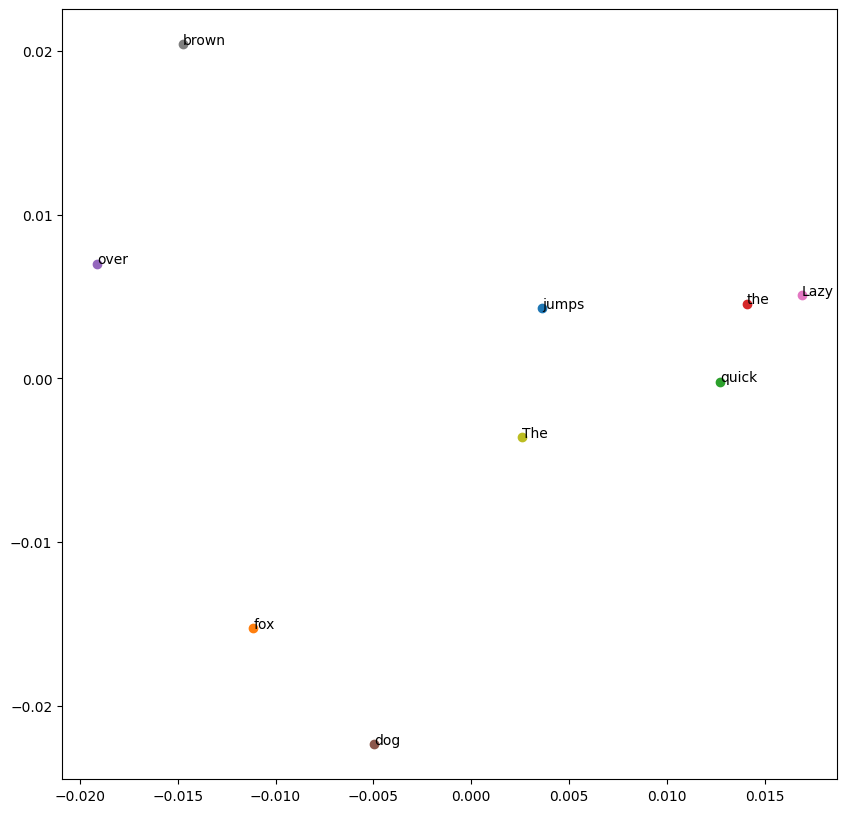

In [3]:
from gensim.models import Word2Vec

# Prepare data for word embeddings
corpus = [text.split() for text in texts]

# Part 1: Train a Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
print("Word2Vec Model:", model)

# Part 2: Visualize the Word Embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Reduce dimensions
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot words
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Venu-GR/INFO-5731_Venu-GR/blob/f418ea03ecf7a332a52a26fa9548342cd27c5975/imdb_annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

This assignment really helped in enhancing my understanding of the concepts and techniques of NLP. Exercises on N-gram analysis, TF-IDF, word embeddings, and sentiment annotation showed that even though language patterns may appear random, they can be summarized using quantifications for information retrieval, text classification, and sentiment analyses. This also includes developing algorithms from scratch and limitations in word embeddings due to data. However, all these helped indicate the importance of applying preprocessing and setting up context into text data upon application. Generally, all the above concepts helped reveal the art of how structured and understandable text data were supposed to be.